### Import Necessary Libraries

In [105]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Database From SQL Server 

In [106]:
cnx = mysql.connector.connect(user='root',
                               password='harjoke98',
                               host='127.0.0.1',
                               port=3306,
                               database='dm_db',
                               auth_plugin='mysql_native_password'
)
print ('connected')

connected


### Select Necesary Table From Database

In [107]:
query1 = 'SELECT * FROM customer'
return_query = pd.read_sql_query(query1, cnx)
df_return_query1 = pd.DataFrame(return_query)
df_return_query1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1288,15565701,Ferri,698,Spain,Female,39,9,161993.89,1,0,0,90212.38
1,4199,15565706,Akobundu,612,Spain,Male,35,1,0.00,1,1,1,83256.26
2,7091,15565714,Cattaneo,601,France,Male,47,1,64430.06,2,0,1,96517.97
3,2021,15565779,Kent,627,Germany,Female,30,6,57809.32,1,1,0,188258.49
4,3698,15565796,Docherty,745,Germany,Male,48,10,96048.55,1,1,0,74510.65


In [108]:
df_return_query1.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'], dtype=object)

In [109]:
df_return_query1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 1015.8+ KB


In [110]:
df_return_query1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


### Transform Necesary Columns

Transforming Numerical Values of HasCrCard and IsActiveMember Columns from 0s and 1s to No and Yes Respectively

In [111]:
# HasCrCard
df_return_query1["HasCrCard"] = df_return_query1["HasCrCard"].map({"0":"No", "1":"Yes"})
# IsActiveMember
df_return_query1["IsActiveMember"] = df_return_query1["IsActiveMember"].map({"0":"Inactive", "1":"Active"})
df_return_query1.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1288,15565701,Ferri,698,Spain,Female,39,9,161993.89,1,No,Inactive,90212.38
1,4199,15565706,Akobundu,612,Spain,Male,35,1,0.00,1,Yes,Active,83256.26
2,7091,15565714,Cattaneo,601,France,Male,47,1,64430.06,2,No,Active,96517.97
3,2021,15565779,Kent,627,Germany,Female,30,6,57809.32,1,Yes,Inactive,188258.49
4,3698,15565796,Docherty,745,Germany,Male,48,10,96048.55,1,Yes,Inactive,74510.65


In [112]:
pd.unique(df_return_query1['Age'].sort_values())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92], dtype=int64)

### Creating Age Group Column

In [113]:
df_return_query1.loc[df_return_query1['Age']<=19, 'AgeGroup'] = '0-19'
df_return_query1.loc[df_return_query1['Age'].between(20,29), 'AgeGroup'] = '20-29'
df_return_query1.loc[df_return_query1['Age'].between(30,39), 'AgeGroup'] = '30-39'
df_return_query1.loc[df_return_query1['Age'].between(40,49), 'AgeGroup'] = '40-49'
df_return_query1.loc[df_return_query1['Age'].between(50,59), 'AgeGroup'] = '50-59'
df_return_query1.loc[df_return_query1['Age']>59, 'AgeGroup'] = '60+'
df_return_query1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,AgeGroup
0,1288,15565701,Ferri,698,Spain,Female,39,9,161993.89,1,No,Inactive,90212.38,30-39
1,4199,15565706,Akobundu,612,Spain,Male,35,1,0.00,1,Yes,Active,83256.26,30-39
2,7091,15565714,Cattaneo,601,France,Male,47,1,64430.06,2,No,Active,96517.97,40-49
3,2021,15565779,Kent,627,Germany,Female,30,6,57809.32,1,Yes,Inactive,188258.49,30-39
4,3698,15565796,Docherty,745,Germany,Male,48,10,96048.55,1,Yes,Inactive,74510.65,40-49


In [114]:
df = df_return_query1.copy()

### Data Exploration

### Credit Worthness Dependence on Balance and Salary

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

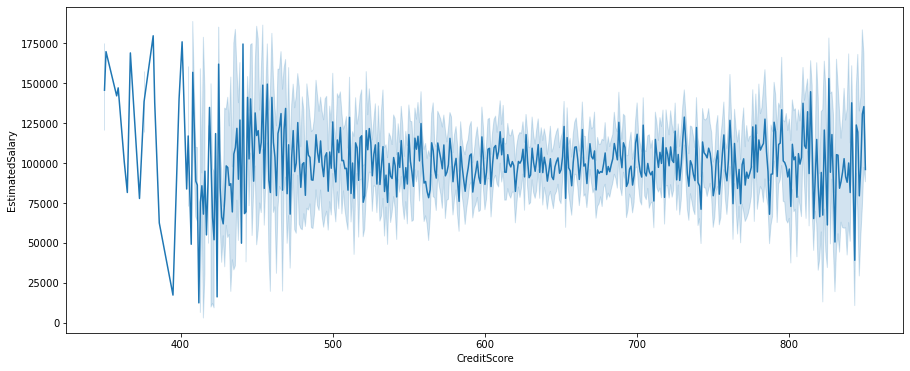

In [119]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x = "CreditScore", y = "EstimatedSalary")

<AxesSubplot:xlabel='CreditScore', ylabel='Balance'>

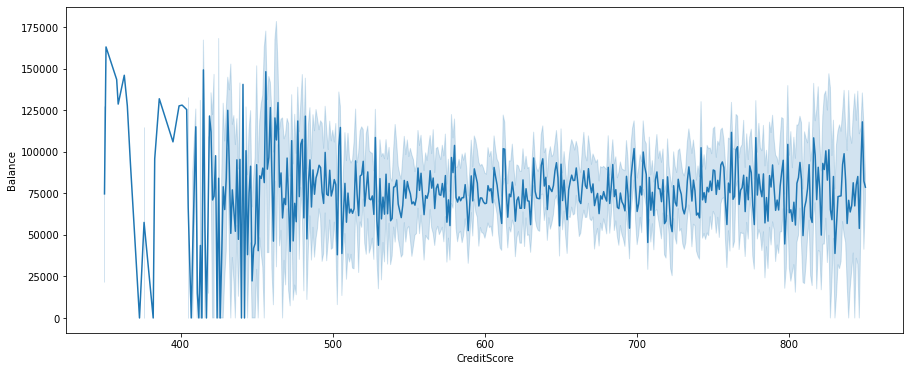

In [120]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x = "CreditScore", y = "Balance")

### Top Location With Payment and Credit Worthiness

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

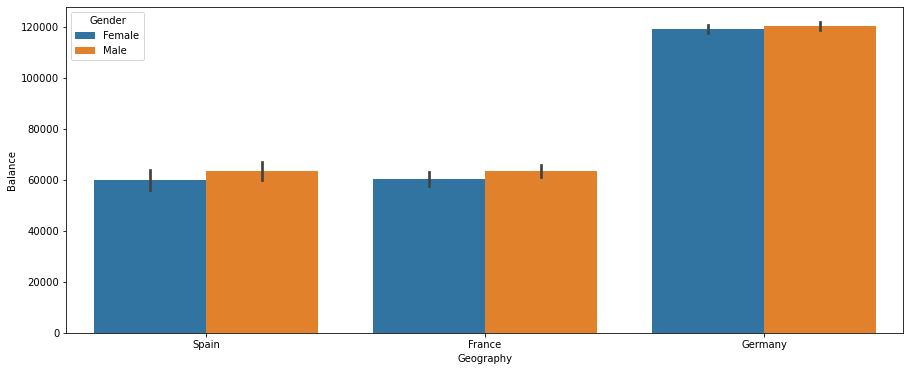

In [142]:
## Account Balance
plt.figure(figsize=(15,6))
sns.barplot(data = df, x = "Geography", y= "Balance", hue="Gender")

<AxesSubplot:xlabel='Geography', ylabel='CreditScore'>

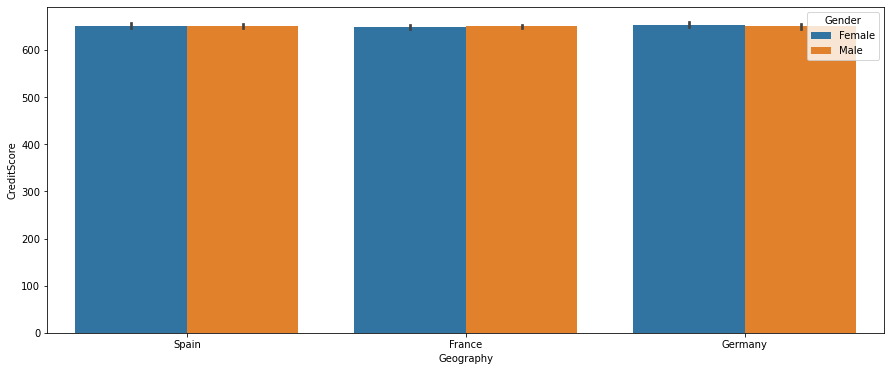

In [146]:
## Credit Score
plt.figure(figsize=(15,6))
sns.barplot(data = df, x = "Geography", y= "CreditScore", hue="Gender")

### Ease Of Access to Credit Card

<AxesSubplot:xlabel='AgeGroup', ylabel='CreditScore'>

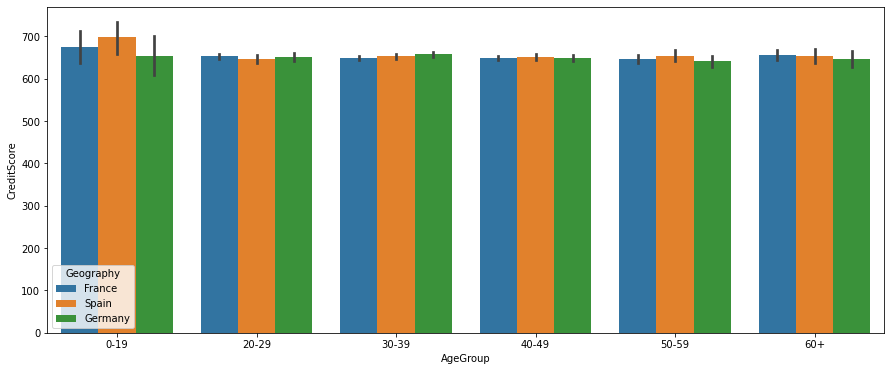

In [122]:
plt.figure(figsize=(15,6))
sns.barplot(data = df.sort_values("AgeGroup", ascending=True), x = "AgeGroup", y="CreditScore", hue="Geography")


### Top Customers By Quantity of Product Purchased

<AxesSubplot:xlabel='Surname', ylabel='NumOfProducts'>

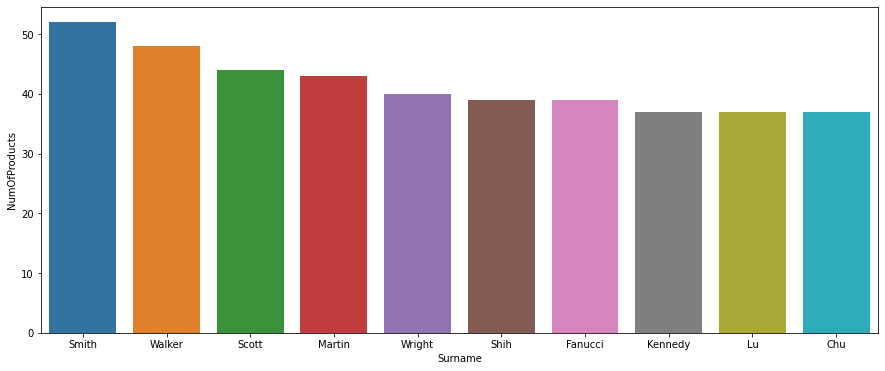

In [123]:
df_TopCust= df.groupby("Surname", as_index=False)["NumOfProducts"].sum().sort_values(by="NumOfProducts", ascending=False).head(10)
plt.figure(figsize=(15,6))
sns.barplot(data=df_TopCust, x='Surname', y='NumOfProducts', dodge=False)

### Loyal Customers Ranking

<AxesSubplot:xlabel='Surname', ylabel='Tenure'>

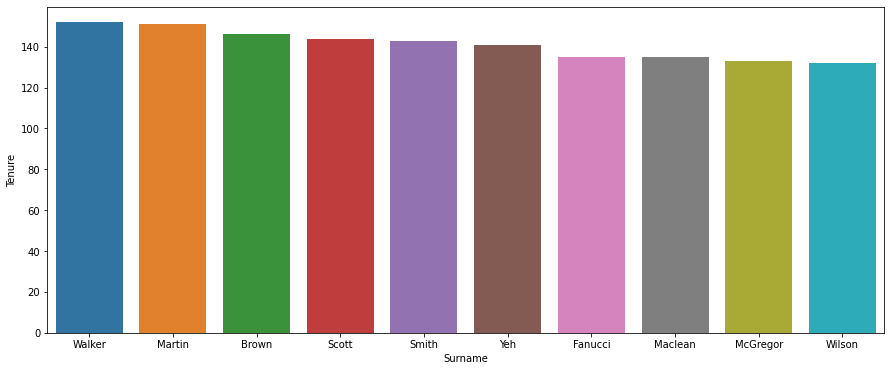

In [124]:
df_TopCust= df.groupby("Surname", as_index=False)["Tenure"].sum().sort_values(by="Tenure", ascending=False).head(10)
plt.figure(figsize=(15,6))
sns.barplot(data=df_TopCust, x='Surname', y='Tenure', dodge=False)

### Customer Activeness Influence on Quantity of Product Purchased

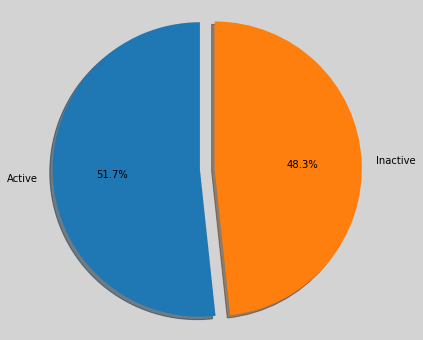

In [138]:
df_CustAct = df.groupby(['IsActiveMember'])['NumOfProducts'].sum().reset_index(name = 'TotalProducts')
labels = df_CustAct["IsActiveMember"]
sizes = df_CustAct['TotalProducts']
explode = (0, 0.1)
fig = plt.figure(figsize=(6, 6))
fig.set_facecolor('lightgrey')
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

### Influence of Customer's Tenure over Quantity Purchased

<AxesSubplot:xlabel='Tenure', ylabel='NumOfProducts'>

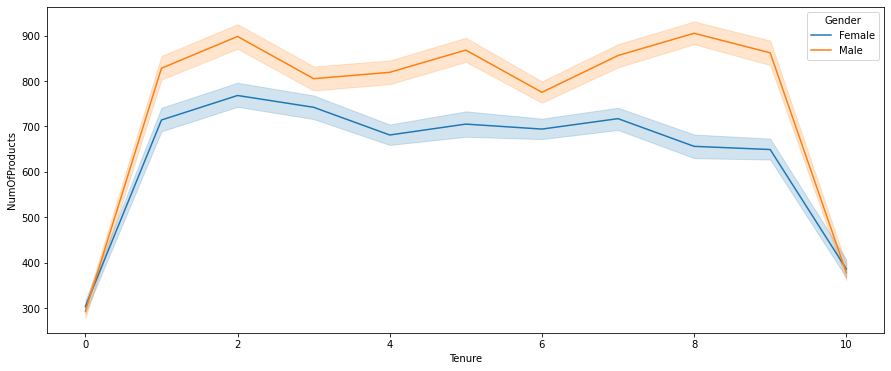

In [126]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df, x = "Tenure", y="NumOfProducts", estimator="sum", hue="Gender")

### CONCLUSION

1. Credit worthiness(Credit Score) seems to have no effect on both salary and balance of customers
2. Germany has very high acccount balance among its customers compare to other country's customers
3. Average Credit Score for all customers across all countries is almost equal
4. In contrast to previous observation, Customers in their teenage years have far higher credit worthiness than those froom other countries
5. Suprisingly, active customers and inactive customers purchase fairly similar amount of products with the former slightly edging the later
6. Quantity of products purchase by customers increase up till second year of patronage then continuously regress 
